# Part-1 Calculate features of URL and create dataset to train model

In part 1, we used **URLFeature** class to calculate **8 features** and save them in **data_urls.csv**

## Import third-party modules

In [1]:
import math
from sklearn.feature_extraction.text import CountVectorizer
import re
import pandas as pd
from IPython.display import Image
import os
import sys

## Self-defined function
**parse_url()** function is used for eliminate 'http://' or 'https://' in the front of the whole URL.

In [2]:
def parse_url(url):
    if 'http://' in url:
        return url.split('http://', 1)[-1]
    elif 'https://' in url:
        return url.split('https://', 1)[-1]
    else:
        return url

## Self-defined class: URLFeatures
In this part, we established a **class**, named **URLFeature**<br>
+ It has 1 data member and 9 function members. 
+ The data is named as url, to save url data into the object
+ Eight functions is used to calculate 8 features
+ Final function is used to incorporate the url and 8 features into a list

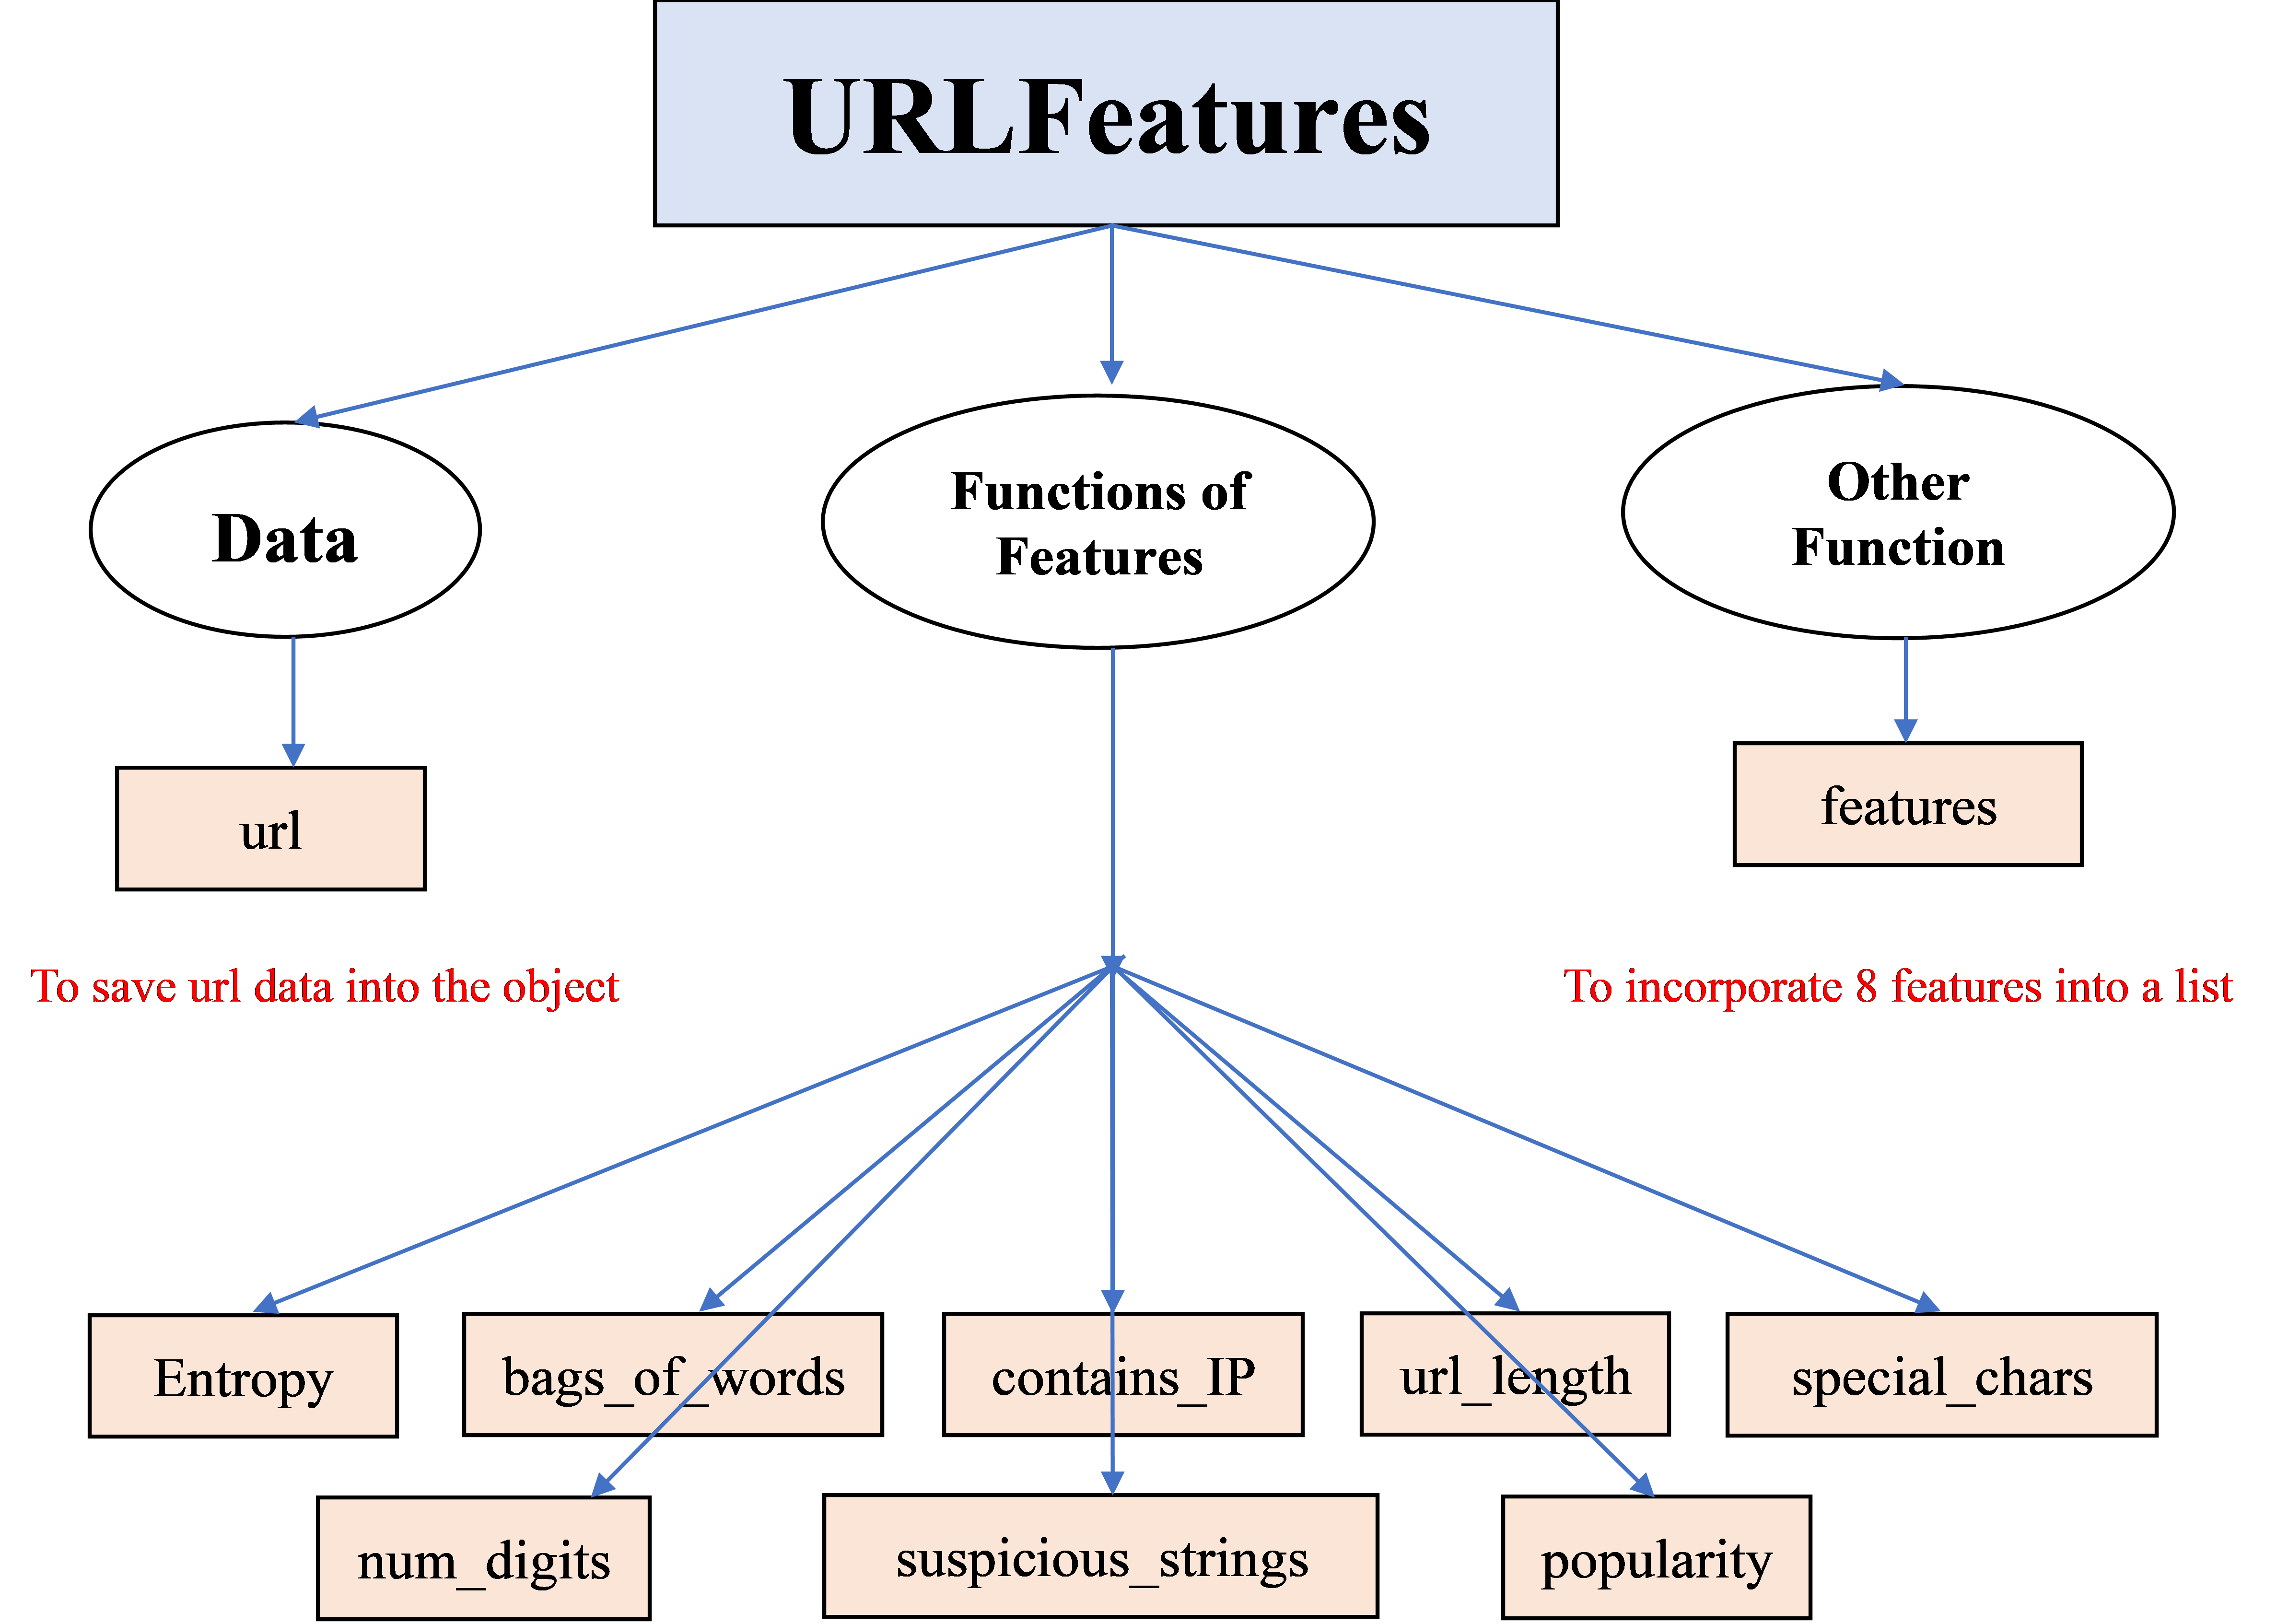

In [3]:
Image('Class.png', width = 240*3, height = 170*3)

**8 Features' Explanation**
1. **Entropy** is to calculate the entropy of the url string. Malicious URLs often have a higher entropy
2. **bag_of_words** is used to get the number of kind of words that have appeared in the url, with the help of regularization module.
3. **contains_IP** is used to judge if there is an IP address in the URL.
4. **url_length** is to get the length of the URL. Malicious URLs can often be very long in comparrison to benign URLs.
5. **special_chars** consist of ';','%','!','&',':'. This function is used to get the occurance number of special chars in the URL.
6. **num_digits** is used to get the number of 0-9 in the URL. Sometimes Malicious URLs contain a higher number of special characters.
7. **suspicious_strings** is used to detect suspicious string in the URL, such as '.exe', 'cmd=' and so on.
8. **popularity** is to judge if the host name of the url is contained in the top_1_million websites' IP address.

Below is the definition of the **URLFeatures Class**

In [4]:
class URLFeatures():
    def __init__(self, url):
        self.url = url
    
    def Entropy(self):
        if not self.url:
            return 0
        entropy = 0
        chars = set(list(self.url))
        length = len(self.url)
        for i in chars:
            p_x = self.url.count(i)/length
            entropy += - p_x*math.log(p_x, 2)
        return entropy
    # Bag Of Words method is used for text analysis.
    # Here URLs are described by word occurrences while completely 
    # ignoring the relative position information of the words in  the document.
    def bag_of_words(self):
        vectorizer = CountVectorizer()
        content = re.split('\W+', self.url)
        X = vectorizer.fit_transform(content)
        return X.shape[1]
    
    # Contains IP method to check the occurence of an IP address within a URL.
    def contains_IP(self):
        check = self.url.split('/')
        reg = re.compile("^(([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])\.){3}([0-9]|[1-9][0-9]|1[0-9]{2}|2[0-4][0-9]|25[0-5])$")
        for item in check:
            if re.search(reg, item):
                return 1
        return 0
    
    # URL Length method to calculate the URL length.
    # Malicious URLs can often be very long in comparrison to benign URLs.
    def url_length(self): return len(self.url)
    
    # Special Characters method to check for specific special chars.
    # Sometimes Malicious URLs contain a higher number of special characters.
    # In this method, a counter is used to count the number of special characters 
    # that are found within a URL.
    def special_chars(self):
        counter = 0
        str_list=['*',';','%','!','&',':']
        for i in str_list:
            counter += self.url.count(i)
        return counter

    # Suspicious Strings method to check for suspicious strings within the URLs.
    # A higher number of suspicious strings would indicate a possibly malicious URL. 
    def suspicious_strings(self):
        '''
        '.exe': Malicious URLs may contain the string '.exe' in reference to downloading a possibly malicious executable.
        'base64': Malicious URLs may use base64 encoding to encode and possibly obfuscate information.
        '/../' & '.pdf': The occurence of '/../' may possibly indicate file inclusion.
        'free' & 'Free' & 'FREE': Fishing can use social engineering to lure victims to click on malicious links. The use of the word free may be included within URLs to trick users in visiting malicious websites.
        '.onion' & '.tor': references the use of tor.
        '.top' & '.bid' & '.ml': Such domains are suspicious and according to RFC 7686 should be kept off public internet.
        'bitcoin' & '.bit' & '.php?email=': Bitcoin references.
        'cmd=': Possible command execution.
        Parameters
        ----------
        url : str
            URL string

        Returns
        -------
        counter : int
            Total number of suspicious_strings.
        '''
        counter = 0
        str_list=['.exe', 'base64', '/../', '.pdf', 'free', 'Free',
                  'FREE', '.onion', '.tor', '.top', '.bid', '.ml',
                  'bitcoin', '.bit', '.php?email=', 'cmd=']
        for i in str_list:
            if i in self.url: counter +=1
        return counter

    # Number Of Digits method returns the number of digits contained within a URL.
    # Malicious URLs often have a higher entropy and can contain lots of numbers.
    def num_digits(self):
        return sum([i.isdigit() for i in self.url])

    # Popularity method checks the url popularity against the top 1 million urls 
    # contained within the umbrella dataset.
    # Sites contained within this dataset are not malicious.
    def popularity(self):
        domain = self.url.split('/', 1)[0]
        if domain in top_website.values:
            return 1
        else:
            return 0
    def features(self):
        feature_list = [self.url, self.Entropy(), self.bag_of_words(),
                        self.contains_IP(), self.url_length(),
                        self.special_chars(), self.suspicious_strings(),
                        self.num_digits(), self.popularity()]
        return feature_list

## Extract features from designated URL

In this function, we firstly **parse the url** for following processing.<br>Then we use **URLFeatures** class to get 8 features that we want, in the format of **list**.

In [5]:
def extract_features(url):
    # Parses input URL to remove http:// or https://.
    parsed_url = parse_url(url)
    # Initiate a calculator to get features from class URLFeatures
    calculator = URLFeatures(parsed_url)
    # Appends URL to features list.
    features=calculator.features()
    return features

## Create_dataset for training model

**In this part**,
1. Create a csv, named **data_urls.csv**.
2. Get 10000 urls from **malicious_urls.csv** and **benign_urls.csv**. And each of them contains 5000 urls.
3. Calculate 8 features by **URLFeatures** class, and incorporate them into a **list**.
4. Write the lists, row by row, into **data_urls.csv** to save the data for training model.

In [6]:
def create_dataset():
    output_file = "data_urls.csv"
    csv_delimeter = '|'
    csv_columns = ["URL","Entropy","BagOfWords","ContainsIP","LengthURL",
                   "SpecialChars","SuspiciousStrings","NumberOfDigits",
                   "Popularity","Malicious"]
    # Opens file that features will be written to for reading.
    feature_file = open(output_file, 'a', encoding = 'utf-8')
    # Writes the feature column names to csv file. 
    feature_file.write(csv_delimeter.join(csv_columns) + "\n")
    # Opens the malicious URLs file for reading and creates a list
    # that contains all the rows (URLs) from the file.
    malicious_urls = pd.read_csv('malicious_urls.csv', squeeze = True,
                                  usecols = ['URL'])
    benign_urls = pd.read_csv('benign_urls.csv', squeeze = True, usecols = ['URL'])
    for i, url in enumerate(malicious_urls):
        try:
            features = extract_features(url)
        except:
            print("Error: extract features index: {0:d}, m_url: {1:s}.\n".format(i, url))
        features.append(1)
        feature_file.write(csv_delimeter.join(map(lambda x: str(x), features)) + '\n')
        if (i+1)%100==0:
            print('malicious: {0:d}/5000'.format(i+1))
    
    for i, url in enumerate(benign_urls):
        try:
            features = extract_features(url)
        except:
            print("Error: extract features index: {0:d}, b_url: {1:s}.\n".format(i, url))
        features.append(0)
        feature_file.write(csv_delimeter.join(map(lambda x: str(x), features)) + '\n')
        if (i+1)%100==0:
            print('benign: {0:d}/5000'.format(i+1))
    feature_file.close()

## Execute the script above

In [7]:
top_website = pd.read_csv('top1m_rank.csv', delimiter='|', usecols = ['URL'], squeeze = True)
create_dataset()

malicious: 100/5000
malicious: 200/5000
malicious: 300/5000
malicious: 400/5000
malicious: 500/5000
malicious: 600/5000
malicious: 700/5000
malicious: 800/5000
malicious: 900/5000
malicious: 1000/5000
malicious: 1100/5000
malicious: 1200/5000
malicious: 1300/5000
malicious: 1400/5000
malicious: 1500/5000
malicious: 1600/5000
malicious: 1700/5000
malicious: 1800/5000
malicious: 1900/5000
malicious: 2000/5000
malicious: 2100/5000
malicious: 2200/5000
malicious: 2300/5000
malicious: 2400/5000
malicious: 2500/5000
malicious: 2600/5000
malicious: 2700/5000
malicious: 2800/5000
malicious: 2900/5000
malicious: 3000/5000
malicious: 3100/5000
malicious: 3200/5000
malicious: 3300/5000
malicious: 3400/5000
malicious: 3500/5000
malicious: 3600/5000
malicious: 3700/5000
malicious: 3800/5000
malicious: 3900/5000
malicious: 4000/5000
malicious: 4100/5000
malicious: 4200/5000
malicious: 4300/5000
malicious: 4400/5000
malicious: 4500/5000
malicious: 4600/5000
malicious: 4700/5000
malicious: 4800/5000
m